In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
from database import create_df

X, y = create_df()
X.head()

,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,Developer,Genre,Publisher,Achievement_rate
appid,,,,,,,,,,
10,game,9.99,2000-11-01,-1,0,1,Valve,Action,Valve,NaN
20,game,4.99,1999-04-01,-1,0,1,Valve,Action,Valve,NaN
30,game,4.99,2003-05-01,79,0,1,Valve,Action,Valve,NaN
40,game,4.99,2001-06-01,-1,0,1,Valve,Action,Valve,NaN
50,game,4.99,1999-11-01,-1,0,1,Gearbox Software,Action,Valve,0.06


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9731 entries, 10 to 328080
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Type              9731 non-null   object        
 1   Price             9731 non-null   float64       
 2   Release_Date      9731 non-null   datetime64[ns]
 3   Rating            9731 non-null   int64         
 4   Required_Age      9731 non-null   int64         
 5   Is_Multiplayer    9731 non-null   int64         
 6   Developer         9546 non-null   object        
 7   Genre             9494 non-null   object        
 8   Publisher         9731 non-null   object        
 9   Achievement_rate  5394 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 836.3+ KB


In [4]:
# features
category_cols = ['Type', 'Required_Age', 'Is_Multiplayer', 'Developer', 'Genre', 'Publisher']
numeric_cols = ['Price', 'Rating', 'Achievement_rate']
date_cols = ['Release_Date']

In [5]:
info = []
for col in X.columns:
    info.append({
        "column": col,
        "data type": X[col].dtype,
        "unique count": X[col].nunique(),
        "null": X[col].isnull().sum()
    })
pd.DataFrame(info)

,column,data type,unique count,null
0,Type,object,4,0
1,Price,float64,52,0
2,Release_Date,datetime64[ns],1290,0
3,Rating,int64,74,0
4,Required_Age,int64,8,0
5,Is_Multiplayer,int64,2,0
6,Developer,object,2306,185
7,Genre,object,22,237
8,Publisher,object,1444,0
9,Achievement_rate,float64,1850,4337


------------------------
Column: Price
count   9,731.00
mean       12.44
std        12.25
min         0.00
25%         4.99
50%         9.99
75%        14.99
max       199.99
Name: Price, dtype: float64
[  9.99   4.99  19.99  39.99   7.99   0.    14.99   6.49   6.99 199.99
  15.99  49.99   2.99  12.99  14.95  24.99   7.49   3.99   8.99   5.99
  29.99   2.49   1.99   0.99  34.99  11.99  99.99  32.99   4.49  15.
  79.99  59.99  13.99  59.95  27.99  69.99   9.9   16.99  28.99  18.99
  30.    17.99 149.99  23.99   9.95   3.49  89.99 124.99  54.99 174.99
  44.99  14.86]


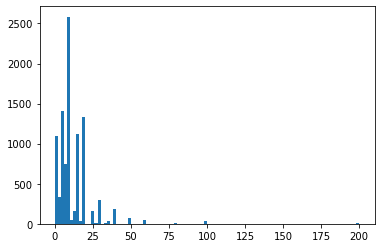

------------------------
Column: Rating
count   9,731.00
mean       23.48
std        35.21
min        -1.00
25%        -1.00
50%        -1.00
75%        66.00
max        96.00
Name: Rating, dtype: float64
[-1 79 96 65 71 88 80 87 90 92 89 95 77 83 69 81 72 75 84 76 82 56 68 73
 94 74 61 59 91 86 67 33 57 78 55 70 62 93 60 35 66 85 54 53 63 58 52 43
 24 42 64 51 41 50 44 29 47 49 45 30 46 48 38 34 36 37 22 23 39 16 27 20
 40 32]


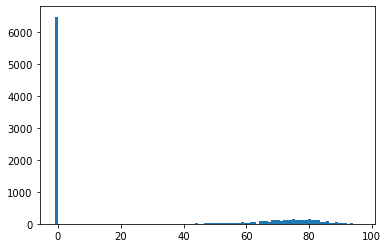

------------------------
Column: Achievement_rate
count   5,394.00
mean       12.61
std         9.77
min         0.00
25%         5.59
50%        10.63
75%        17.39
max        84.10
Name: Achievement_rate, dtype: float64
[        nan  0.05784262  0.04343673 ... 30.37091104 16.9980038
  9.6621115 ]


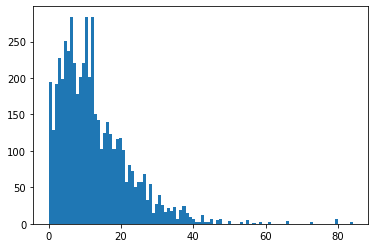

In [7]:
for num_col in numeric_cols:
    print('------------------------')
    print(f"Column: {num_col}")
    print(X[num_col].describe())
    print(X[num_col].unique())
    plt.hist(X[num_col], bins=100)
    plt.show()

------------------------
Column: Type with 4 values
game    9580
dlc       81
mod       59
demo      11
Name: Type, dtype: int64


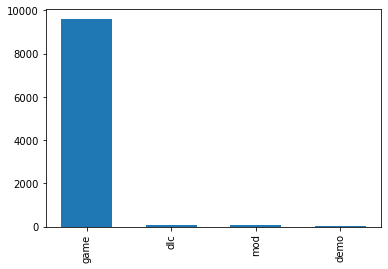

------------------------
Column: Required_Age with 8 values
0     8985
17     579
18      66
13      57
16      34
15       6
10       3
6        1
Name: Required_Age, dtype: int64


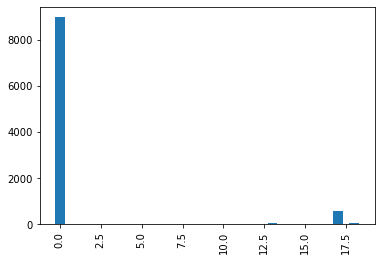

------------------------
Column: Is_Multiplayer with 2 values
0    6521
1    3210
Name: Is_Multiplayer, dtype: int64


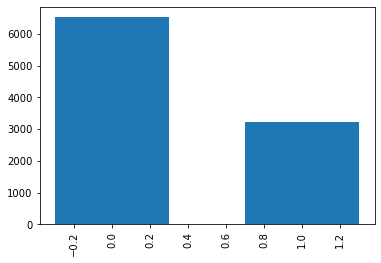

------------------------
Column: Developer with 2306 values
Humongous Entertainment    107
MumboJumbo                  44
Feral Interactive (Mac)     41
Bohemia Interactive         40
Telltale Games              38
                          ... 
Killspace Entertainment      1
Future Games                 1
Rainbow Studios              1
Machine Games                1
studio4                      1
Name: Developer, Length: 2306, dtype: int64


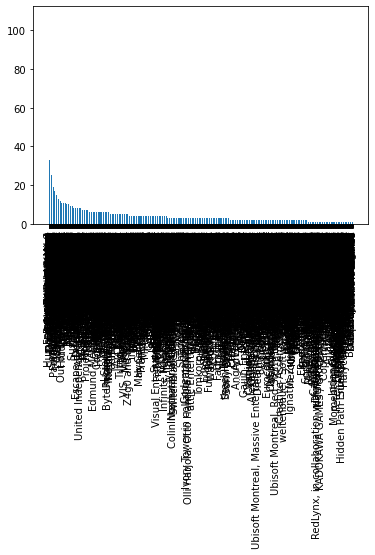

------------------------
Column: Genre with 22 values
Action                   1975
Indie                    1864
Adventure                1210
Strategy                 1045
Casual                    827
RPG                       744
Simulation                598
Early Access              370
Racing                    214
Free to Play              199
Sports                    159
Massively Multiplayer     110
Utilities                  44
Design & Illustration      32
Animation & Modeling       26
Education                  18
Audio Production           15
Software Training          15
Video Production           10
Web Publishing             10
Photo Editing               8
Accounting                  1
Name: Genre, dtype: int64


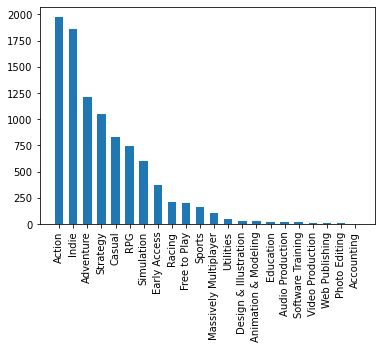

------------------------
Column: Publisher with 1444 values
                          183
Ubisoft                   167
KISS ltd                  166
Meridian4                 138
Strategy First            109
                         ... 
Microsoft Game Studios      1
Phosfiend Systems           1
ALLPlayer Group Ltd.        1
BlackMoon Design            1
Unfinished Pixel            1
Name: Publisher, Length: 1444, dtype: int64


/home/yoojin/miniconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yoojin/miniconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


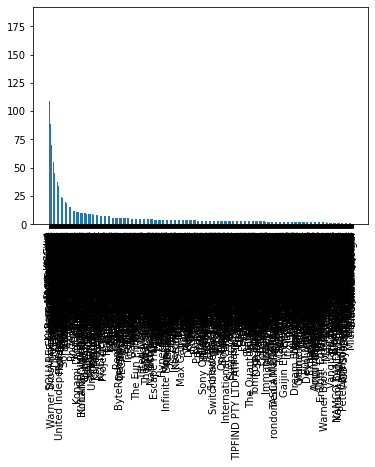

In [8]:
for cat_col in category_cols:
    print('------------------------')
    print(f"Column: {cat_col} with {X[cat_col].nunique()} values")
    value_dict = X[cat_col].value_counts()
    print(value_dict)
    plt.xticks(rotation=90)
    plt.bar(value_dict.index, value_dict.values, width=0.6)
    plt.show()

(array([0.00301442, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00031971, 0.00052524, 0.03701801, 0.18134484]),
 array([1970. , 1974.5, 1979. , 1983.5, 1988. , 1992.5, 1997. , 2001.5,
        2006. , 2010.5, 2015. ]),
 <BarContainer object of 10 artists>)

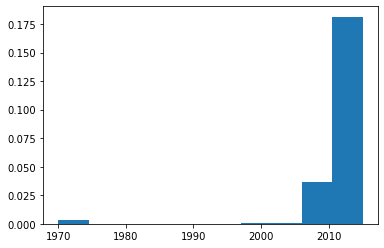

In [9]:
year = pd.DatetimeIndex(X['Release_Date']).year
plt.hist(year, density=True)

(array([0.11369475, 0.07669958, 0.07810091, 0.09388926, 0.06857186,
        0.08968526, 0.080997  , 0.10024196, 0.0999617 , 0.10724862]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

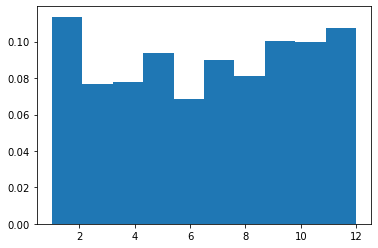

In [10]:
month = pd.DatetimeIndex(X['Release_Date']).month
plt.hist(month, density=True)

(array([1086., 1021.,  849.,  885., 1014., 1327.,  866.,  879.,  767.,
        1037.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

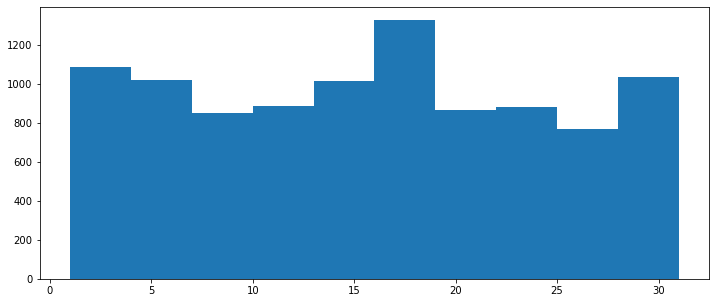

In [18]:
day = pd.DatetimeIndex(X['Release_Date']).day
plt.hist(day)